In [1]:
# coding:utf8
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

from mydatools.plot import plot_classifier_paras

%matplotlib inline

In [2]:
class Kmeans():
    def __init__(self, n_clusters=2, max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        
    def _init_cluster_center(self, X):
        """从样本中随机取k个点作为中心
        """
        init_idx = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        init_centers = X[init_idx]
        return init_centers
    
    def fit(self, X):
        X = np.array(X)
        
        m = X.shape[0]
        n = X.shape[1]
        k = self.n_clusters

        cluster_centers = self._init_cluster_center(X)
        # 将cluster_centers变为(1,k,n)的形状
        cluster_centers = cluster_centers[np.newaxis, ]
        # 将X变为(m,k,n)的形状，方便后面处理
        X_new = np.tile(X, (self.n_clusters, 1, 1)).transpose([1,0,2])
        
        for cur_iter in range(self.max_iter):
            X_sub = X_new - cluster_centers
            dists = np.linalg.norm(X_sub, 2, axis=-1)
            idx = dists.argmin(axis=-1)
            
            mask = np.zeros([m, k, 1])
            mask[range(m), idx] = 1
            new_centers_mask = np.zeros(X_new.shape)
            new_centers_mask[range(m), idx, :] = X_new[range(m), idx, :]
            new_centers = new_centers_mask.sum(axis=0, keepdims=True) / mask.sum(axis=0, keepdims=True)
            
            if np.all(new_centers == cluster_centers):
                break
            cluster_centers = new_centers
        self._cluster_centers = cluster_centers[0]
    
    def cluster_centers(self):
        return self._cluster_centers
    
    def predict(self, X):
        m = X.shape[0]
        n = X.shape[1]
        k = self.n_clusters
        
        cluster_centers = self._cluster_centers[np.newaxis, ]
        X_new = np.tile(X, (self.n_clusters, 1, 1)).transpose([1,0,2])
        
        X_sub = X_new - cluster_centers
        dists = np.linalg.norm(X_sub, 2, axis=-1)
        idx = dists.argmin(axis=-1)
        
        return idx


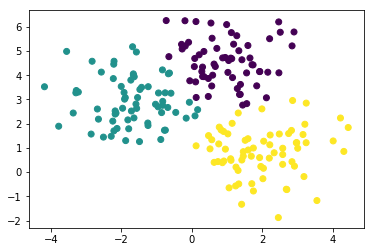

In [3]:
np.random.seed(0)
X_train, y_train = datasets.make_blobs(200)
model = Kmeans(n_clusters=3)
model.fit(X_train)
y = model.predict(X_train)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y)